In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import wget
from celluloid import Camera
import scipy as sp
from scipy import integrate

ModuleNotFoundError: No module named 'celluloid'

In [ ]:
pip install celluloid

# 1.2 Presentación de funciones

Consideremos la serie $$ f(t) = 2 \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} \sin(n t).$$

In [ ]:
def f (t, n):
    return 2*(-1)**(n-1)*np.sin(n*t)/n

In [ ]:
L = np.pi
x = np.linspace(-3*L, 3*L, 1000)
n = 1
nt = 50
F = 0
fig = plt.figure(figsize=(6,6))
camera = Camera(fig)

while n < nt:
    F += f(x,n)
    plt.plot(x,F,c='k')
    camera.snap()
    n += 1

In [ ]:
animation = camera.animate()
animation.save('Fourier.gif')

# 1.4 Derivada espectral

In [2]:
def f(x):
    return np.multiply(np.exp(-0.1*x),np.sin(x))

In [3]:
def fprime(x):
    return np.multiply(np.exp(-0.1*x),np.cos(x)-0.1*np.sin(x))

In [4]:
def fspectral(x, Fs, N):
    fstep = Fs / N
    freq = np.linspace(-25, (N-1)*fstep-25, int(N))
    
    y = f(t)
    X = np.fft.fft(y)
    freq = np.fft.fftshift(freq)
    
    spectral_derivative = freq*X*(1j)
    return np.real(np.fft.ifft(spectral_derivative))

In [5]:
def fright(x):
    dx = 4*np.pi/100
    fright = np.zeros(len(x))
    
    for i in range(len(x)-1):
        fright[i] = (f(x[i+1])-f(x[i]))/dx
    return fright

In [6]:
Fs = 50 # frecuencia de muestreo
tstep = 4*np.pi/100 #1/Fs
f0 = 5
N = int ( 10 * Fs / f0 ) # Numero de muestras

In [7]:
t = np.linspace(-2*np.pi,(N-1)*tstep-2*np.pi,N)

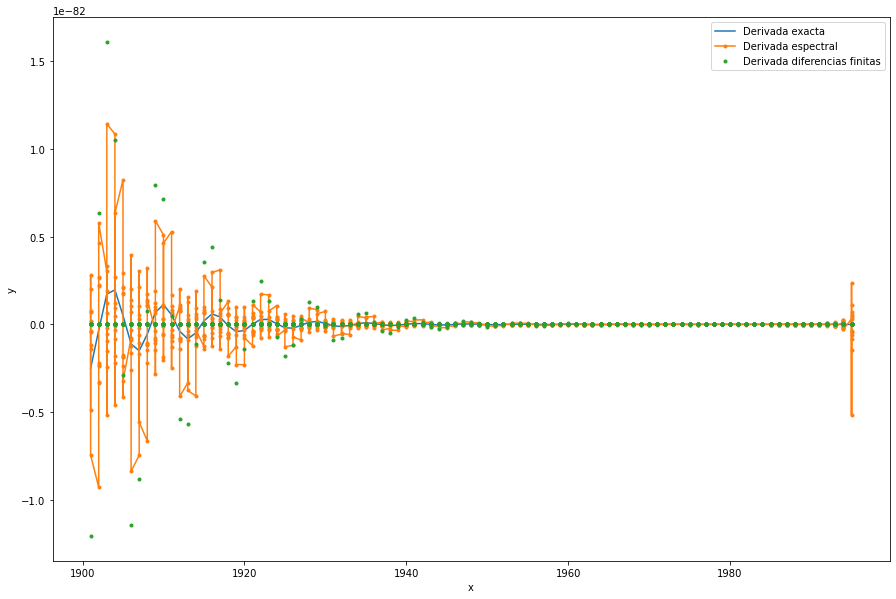

In [24]:
fig = plt.figure(figsize=(15,10))
plt.plot(t, fprime(t), label='Derivada exacta')
plt.plot(t, fspectral(t, Fs, N), '.-', label='Derivada espectral')
plt.plot(t, fright(t), '.', label='Derivada diferencias finitas')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 1.5 Manchas solares

In [9]:
file = 'ManchasSolares.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Descargado')
else:
    Path_ = file

In [10]:
data = np.loadtxt(Path_)

In [11]:
data = data[data[:,0]>1900]
t = data[:,0]
ms = data[:,2]
ms = ms-np.mean(ms)
N = len(t)

In [12]:
X = np.fft.fft(ms)
XMag = np.abs(X)
freq = np.fft.fftfreq(N)

In [13]:
mask = freq<0
X[mask] = 0
freq[mask] = 0
XMag[mask] = 0

In [14]:
freq2 = freq[0:int(N/2+1)]
XMag2  = 2.0*XMag[0:int(N/2+1)]

<StemContainer object of 3 artists>

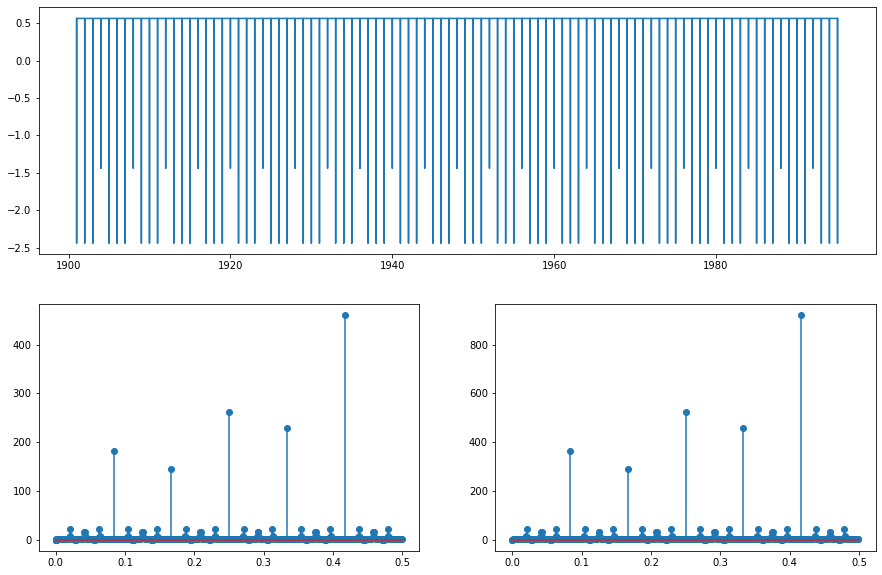

In [15]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(2,1,1)
ax = fig.add_subplot(2,2,3)
ax1 = fig.add_subplot(2,2,4)
ax2.plot(t,ms)
ax.stem(freq, XMag)
ax1.stem(freq2, XMag2)

In [16]:
ii = np.argmax(XMag2)
print(ii,freq[ii])
T = 1/freq[ii]

475 0.4166666666666667


In [17]:
filtrada = np.fft.ifft(2*XMag)

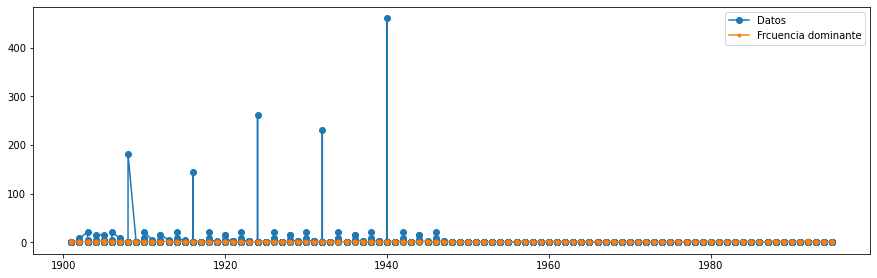

In [23]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax.plot(t,XMag,marker='o',label='Datos')
ax.plot(t,np.real(filtrada),'.-',label='Frecuencia dominante')
plt.legend(loc=1)
ax.

In [18]:
T

2.4